# Data Story and Inferential Stats
The purpose of this jupyter notebook is to analyze and visualize the distrubution of the features in the movie database and their correlation towards the box office features. By analizing these trends, I hope to make insights that will ultimately improve my model

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df=pd.read_csv('train_data')

The first aspect that I will analyze is the correlation between features that are charathcteruzed by ints or floats with the gross movie budget

In [31]:
def divide_int_float_strings(df):
    list_remove=[]
    new_list=[]
    for items in df:
        if isinstance(df[items][0],str):
            list_remove.append(items)
        else:
            new_list.append(items)
    return new_list,list_remove
new_list=divide_int_float_strings(df)[0]

In [7]:
df[new_list].corr()

,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Unnamed: 0,1.000000,-0.311828,-0.254873,-0.110668,-0.183582,-0.156782,-0.256597,-0.316326,-0.214759,0.008269,-0.289080,-0.737304,-0.198763,-0.237686,0.033586,-0.279651,-0.201340
num_critic_for_reviews,-0.311828,1.000000,0.209664,0.212020,0.259252,0.164465,0.173538,0.595060,0.245388,-0.026889,0.554129,0.374640,0.432454,0.311246,0.354731,0.231287,0.704717
duration,-0.254873,0.209664,1.000000,0.196479,0.121359,0.078291,0.069011,0.343618,0.118616,0.021266,0.350086,0.225091,-0.161757,0.156849,0.368013,0.199059,0.208578
director_facebook_likes,-0.110668,0.212020,0.196479,1.000000,0.162819,0.092441,0.026004,0.345231,0.140997,-0.050915,0.245502,0.100549,-0.034220,0.185785,0.212111,0.046615,0.222364
actor_3_facebook_likes,-0.183582,0.259252,0.121359,0.162819,1.000000,0.254845,0.084391,0.297240,0.495783,0.113153,0.232311,0.229759,0.107929,0.638249,0.086717,0.058739,0.286536
actor_1_facebook_likes,-0.156782,0.164465,0.078291,0.092441,0.254845,1.000000,0.049169,0.182921,0.950345,0.058149,0.124639,0.139292,0.075238,0.348312,0.112277,0.075466,0.126470
gross,-0.256597,0.173538,0.069011,0.026004,0.084391,0.049169,1.000000,0.155063,0.074325,-0.034615,0.159806,0.418029,0.067969,0.081573,0.017546,0.067005,0.108230
num_voted_users,-0.316326,0.595060,0.343618,0.345231,0.297240,0.182921,0.155063,1.000000,0.267180,-0.025716,0.770088,0.353312,0.022996,0.311448,0.494101,0.128083,0.504531
cast_total_facebook_likes,-0.214759,0.245388,0.118616,0.140997,0.495783,0.950345,0.074325,0.267180,1.000000,0.081784,0.193944,0.217814,0.107632,0.597291,0.134903,0.094054,0.215389
facenumber_in_poster,0.008269,-0.026889,0.021266,-0.050915,0.113153,0.058149,-0.034615,-0.025716,0.081784,1.000000,-0.075720,-0.015689,0.085772,0.079975,-0.062501,0.026050,0.022677


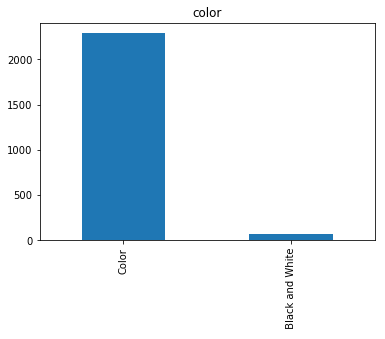

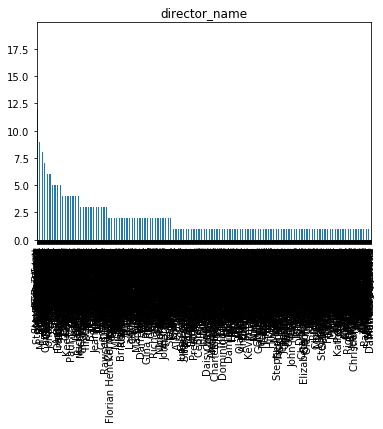

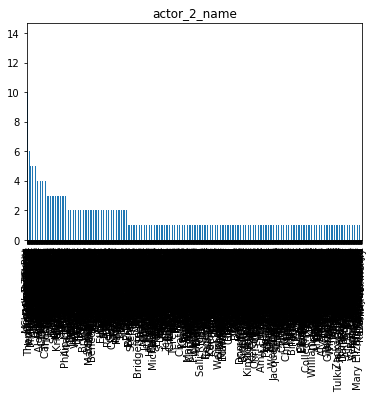

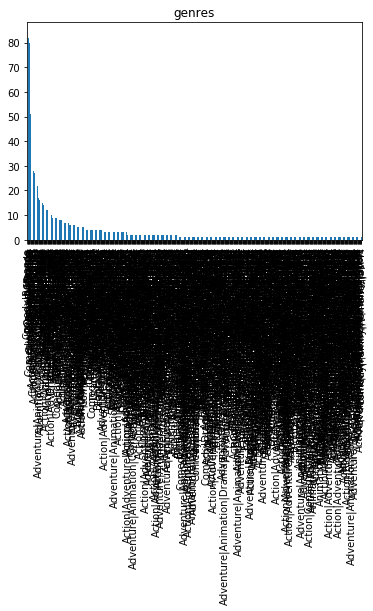

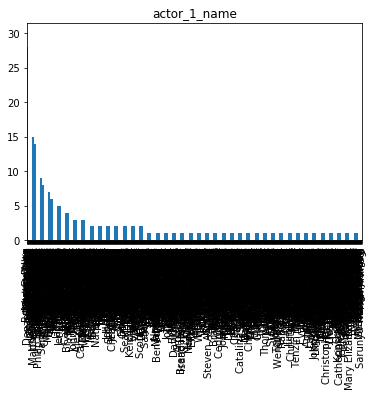

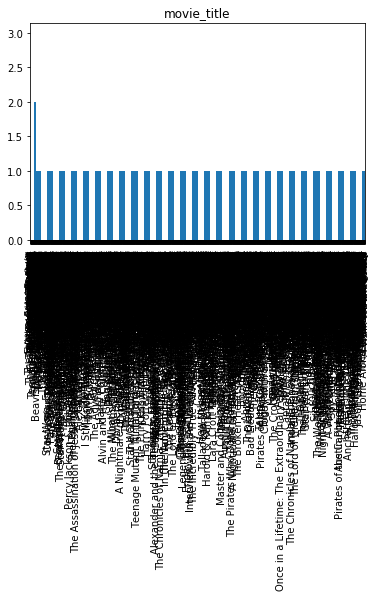

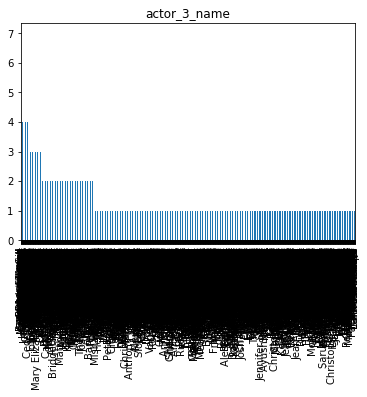

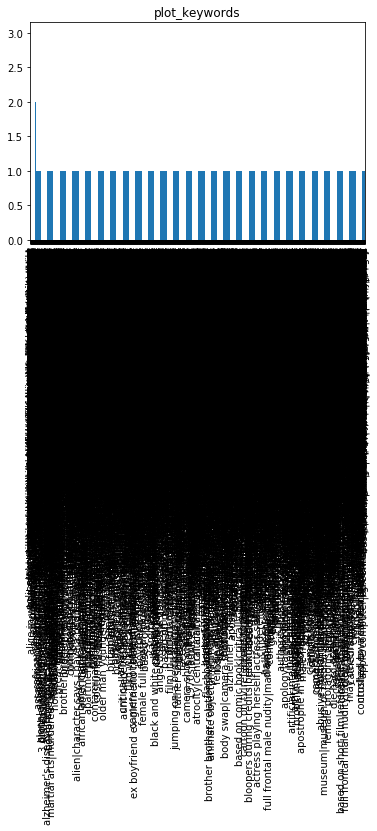

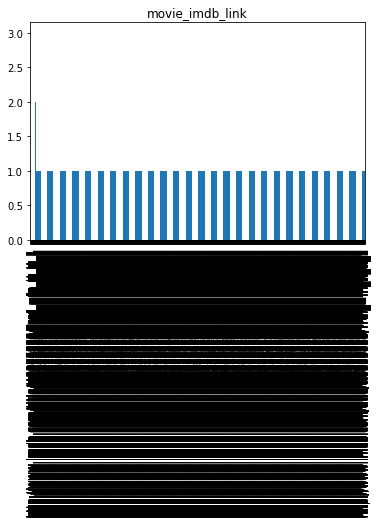

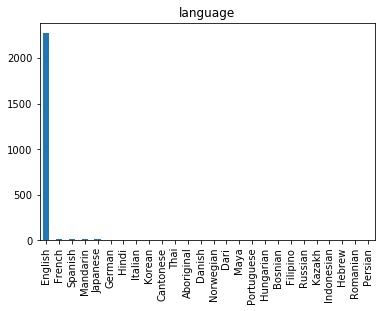

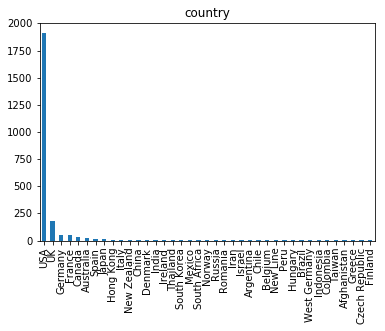

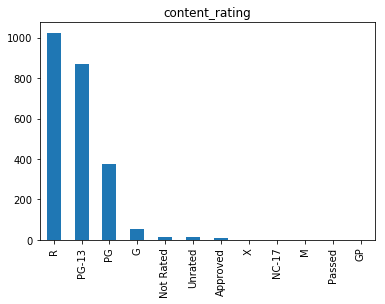

In [8]:
def plot_strings_bars(list_remove):
    for items in list_remove:
        df[items].value_counts().plot(kind='bar')
        plt.title(items)
        plt.show()
plot_strings_bars(divide_int_float_strings(df)[1])

In [9]:
def drop_irelevants(df):
    irrelevants=["Unnamed: 0",'movie_imdb_link','movie_title','language']
    df=df.drop(irrelevants,axis=1)


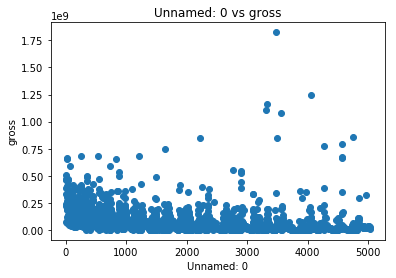

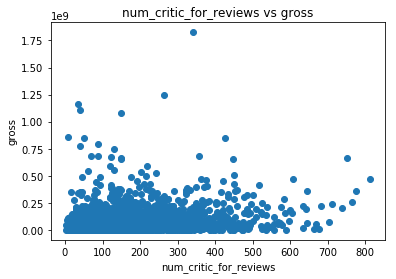

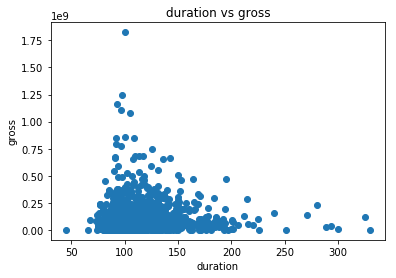

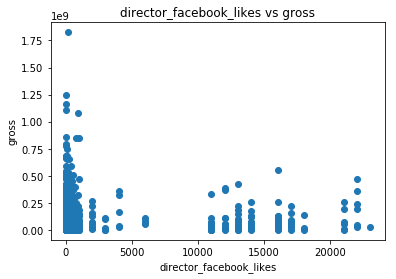

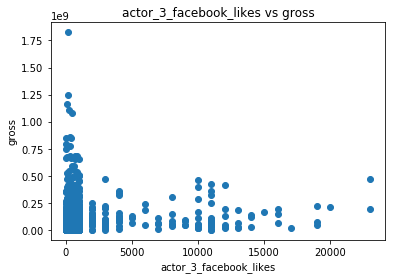

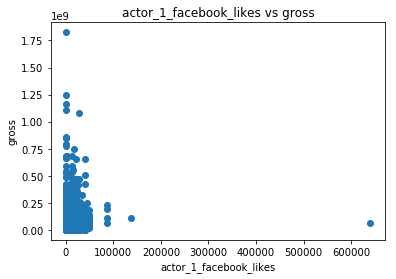

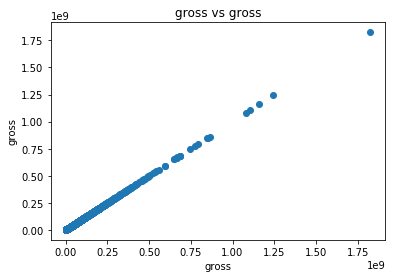

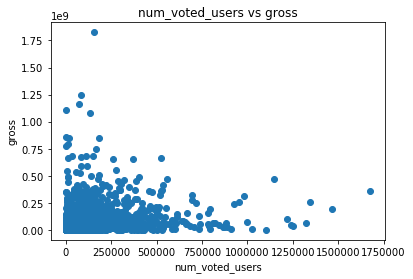

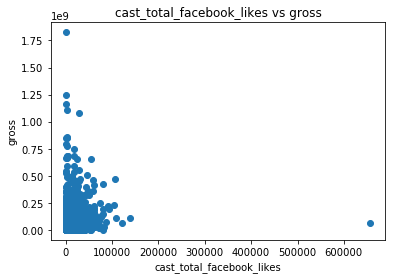

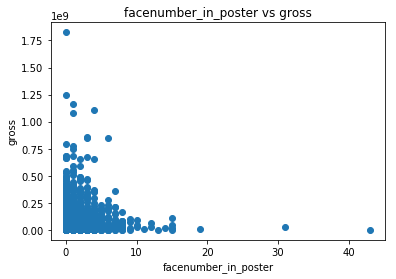

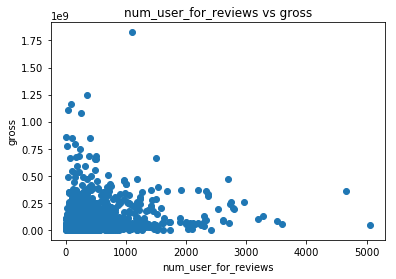

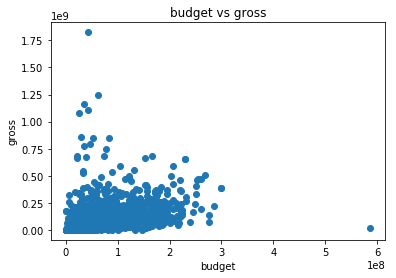

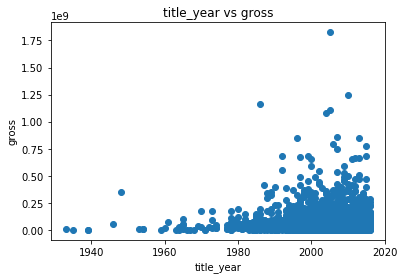

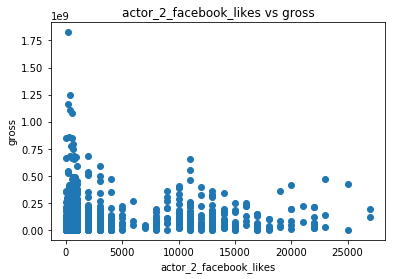

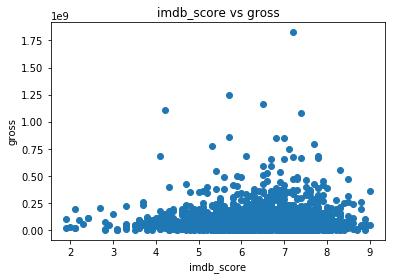

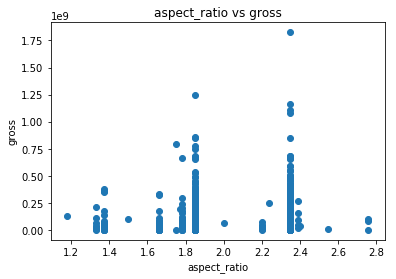

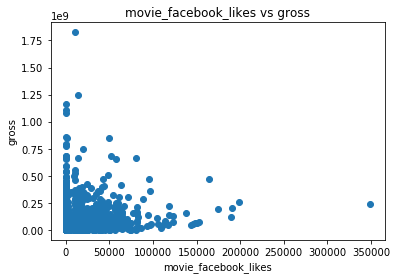

In [10]:
def for_scatter(new_list):
    for items in new_list:
        plt.xlabel(items)
        plt.ylabel('gross')
        plt.title(items+' vs gross')
        plt.scatter(df[items],df['gross'])
        plt.show()
for_scatter(new_list)

The scatter plots between gross and the other aspects dont seem to have any correlation.

In [11]:
def dict_corr(new_list):
    dict1={}
    for items in new_list:
        dict1[items]=df['gross'].corr(df[items])
    return dict1
last_dict=dict_corr(new_list)
last_dict

{'Unnamed: 0': -0.25659660829451825,
 'actor_1_facebook_likes': 0.049168685450571077,
 'actor_2_facebook_likes': 0.081572817429889741,
 'actor_3_facebook_likes': 0.084390796931817627,
 'aspect_ratio': 0.067005345676709738,
 'budget': 0.4180291407648648,
 'cast_total_facebook_likes': 0.074324721971514504,
 'director_facebook_likes': 0.026003672814026157,
 'duration': 0.069010571548799568,
 'facenumber_in_poster': -0.034615056261713996,
 'gross': 1.0,
 'imdb_score': 0.017545643210794794,
 'movie_facebook_likes': 0.10822961810211569,
 'num_critic_for_reviews': 0.17353801769372793,
 'num_user_for_reviews': 0.15980561475663727,
 'num_voted_users': 0.15506301567500869,
 'title_year': 0.067969249913844232}

As verified the features  have little to no correlation with gross. Working with the log of gross may give better results, also working with the log,square or square root of the other features  of budget might also help getting a better correlation with gross

In [28]:
def better_relations(df,new_list):
    better_relation_dict={}
    better_relation_name_d={}
    for items in new_list:
        log=df['gross'].corr(np.log10(df[items]))
        square=df['gross'].corr(np.square(df[items]))
        sqrt=df['gross'].corr(np.sqrt(df[items]))
        normal=df['gross'].corr(df[items])
        method=[log,square,sqrt,normal]
        max1=np.nanmax(method)
        better_relation_dict[items]=max1
        if log==max1:
            better_relation_name_d[items]='log'
        if square==max1:
            better_relation_name_d[items]='square'
        if sqrt==max1:
            better_relation_name_d[items]='sqrt'
        if normal==max1:
            better_relation_name_d[items]='normal'       
    return better_relation_dict,better_relation_name_d
transformer=better_relations(df)[1]

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [13]:
def improve_score(last_dict,better_relations_dict):
    improvement={}
    for items in last_dict:
        improvement[items]=better_relations_dict[items]-last_dict[items]
    return improvement
improve_score(last_dict,better_relations(df)[0])
        
    

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


{'Unnamed: 0': 0.069723664597614005,
 'actor_1_facebook_likes': 0.035601815705165789,
 'actor_2_facebook_likes': 0.0074766572665868059,
 'actor_3_facebook_likes': 0.0032106785947329242,
 'aspect_ratio': 0.0010058340478705241,
 'budget': 0.0039861958343845871,
 'cast_total_facebook_likes': 0.021692403554652434,
 'director_facebook_likes': 0.0073749012007020137,
 'duration': 0.00921136017996943,
 'facenumber_in_poster': 0.0097764680378354223,
 'gross': 0.0,
 'imdb_score': 0.00017691366722974444,
 'movie_facebook_likes': 0.0,
 'num_critic_for_reviews': 0.0021295232597596803,
 'num_user_for_reviews': 0.016156681402273693,
 'num_voted_users': 0.026904058318676843,
 'title_year': 3.6803039805868853e-05}

The correlations improved for most of the outputs, I will lastly use log of gross to see whether it improves the scores

In [14]:
df_copy=df.copy()
df_copy['gross']=np.log10(df_copy['gross'])
improve_score(better_relations(df_copy)[0],better_relations(df)[0])

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


{'Unnamed: 0': 0.069723664597614005,
 'actor_1_facebook_likes': -0.030050377130390243,
 'actor_2_facebook_likes': -0.033927016941867963,
 'actor_3_facebook_likes': -0.024342175945958111,
 'aspect_ratio': -0.03518486295100634,
 'budget': -0.14188117380389853,
 'cast_total_facebook_likes': -0.03434101889985601,
 'director_facebook_likes': 0.0014548721120430722,
 'duration': -0.014043215517995117,
 'facenumber_in_poster': -0.0061021631874619287,
 'gross': 0.0,
 'imdb_score': 0.00017691366722974444,
 'movie_facebook_likes': 0.0,
 'num_critic_for_reviews': 0.0021295232597596803,
 'num_user_for_reviews': 0.012892701215714536,
 'num_voted_users': 0.0092096314299481841,
 'title_year': -0.034126131000325868}

Using log of gross did not improve my model much so I will therefore not use it

In [30]:

def transform_data(df,better_relations):
    df_int=divide_int_float_strings(df)[0]
    for items in df_int:
        if better_relations[items]=='log':
            df[items]=np.log10(df[items])
        if better_relations[items]=='square':
            df[items]=np.square(df[items])
        if better_relations[items]=='sqrt':
            df[items]=np.sqrt(df[items])
    return df
transformed_data=transform_data(df,better_relations(df)[1])

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


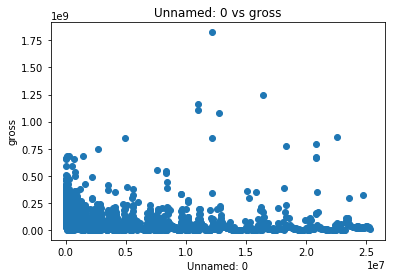

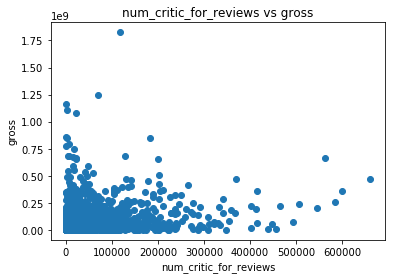

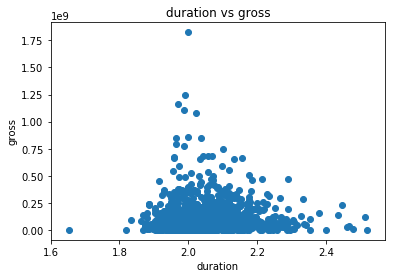

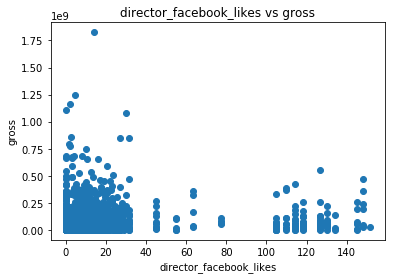

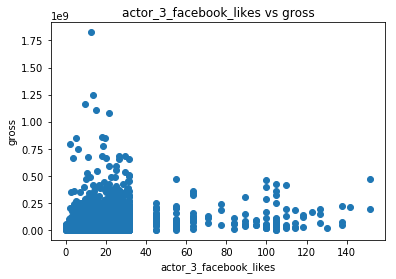

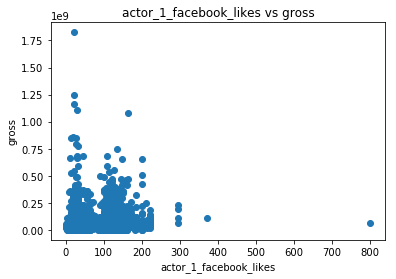

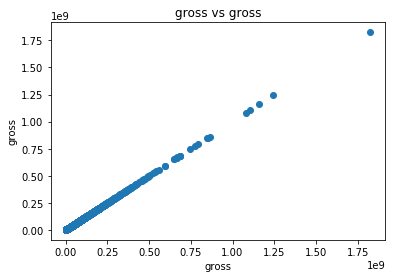

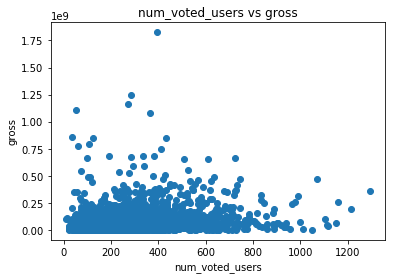

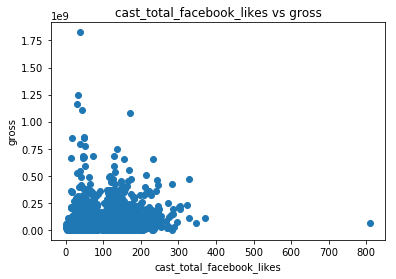

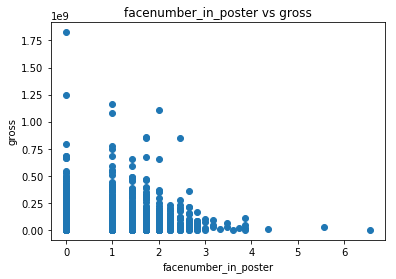

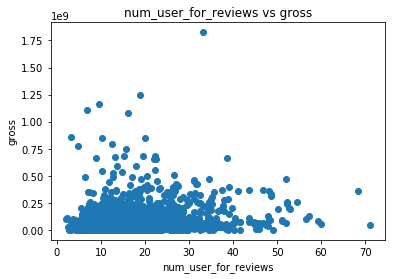

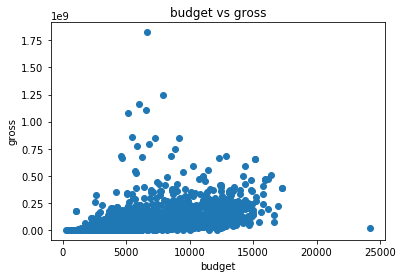

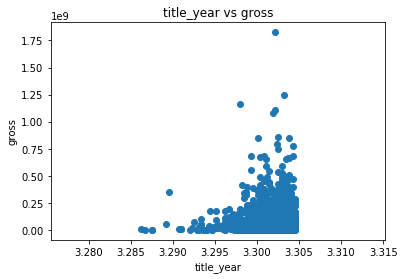

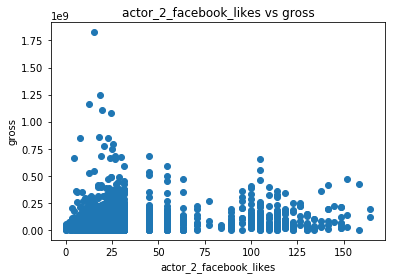

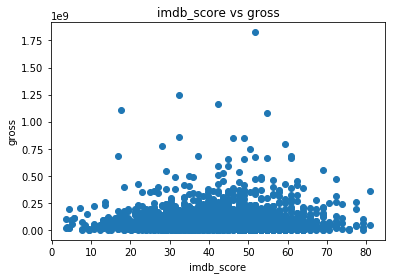

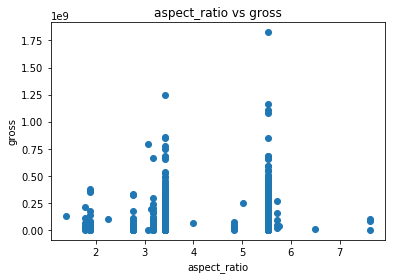

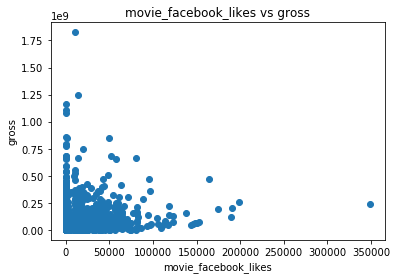

In [16]:
for_scatter(transformed_data[new_list])

## Results:
From the data I've wrangled I have been to construct a number of different scatter plots and understood their correlation to the feature I am interested in predicting ("gross").The correlations improved significantly by using the log of gross and the log of budget rather than just their initial values.
Here are the values sorted by their correlation to gross

In [17]:
df_corr=pd.DataFrame(better_relations(df)[0])
df_corr=df_corr.sort_values('corr',ascending=False)
df_corr=df_corr.drop(df_corr.index[0])
df_corr

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


ValueError: If using all scalar values, you must pass an index